[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Available columns: Index(['ID', 'App', 'Comments\n', 'score', 'Label'], dtype='object')
Top 10 words:
server: 31
issues: 29
sometimes: 18
bank: 18
network: 16
issue: 15
nan: 14
transaction: 10
money: 10
problems: 10

Named Entities:
QR Codes nan Technical - ORG
Server - ORG
Server - NORP
Delay - PERSON
Delay - PERSON
Server - ORG
nan Nothing - WORK_OF_ART
Network - ORG
Bank - ORG
Transaction of money confirmation - ORG
Network - ORG
Daily - PERSON
UPI - ORG
Server - ORG
300 - PRODUCT
Bank - ORG
Password  Nothing  Make - FAC
Nil Bank - ORG
Server - ORG
UPI - ORG
Tower - GPE
UPI - ORG
Server - PERSON
2 - CARDINAL
UPI - ORG
Server - NORP
Server - ORG
Transaction - ORG
Delayed - PERSON
Server - ORG
Bank Server - ORG
Almost None Network - PRODUCT
Nil - PERSON
UPI - ORG
Janice - ORG
Transaction - NORP
Idk Nathing - PERSON
Network - ORG
Transactions - PERSON
Network - ORG
Bank - ORG
Server - ORG
UPI - ORG
Bank - ORG
Bank - ORG
UPI Sometimes - ORG


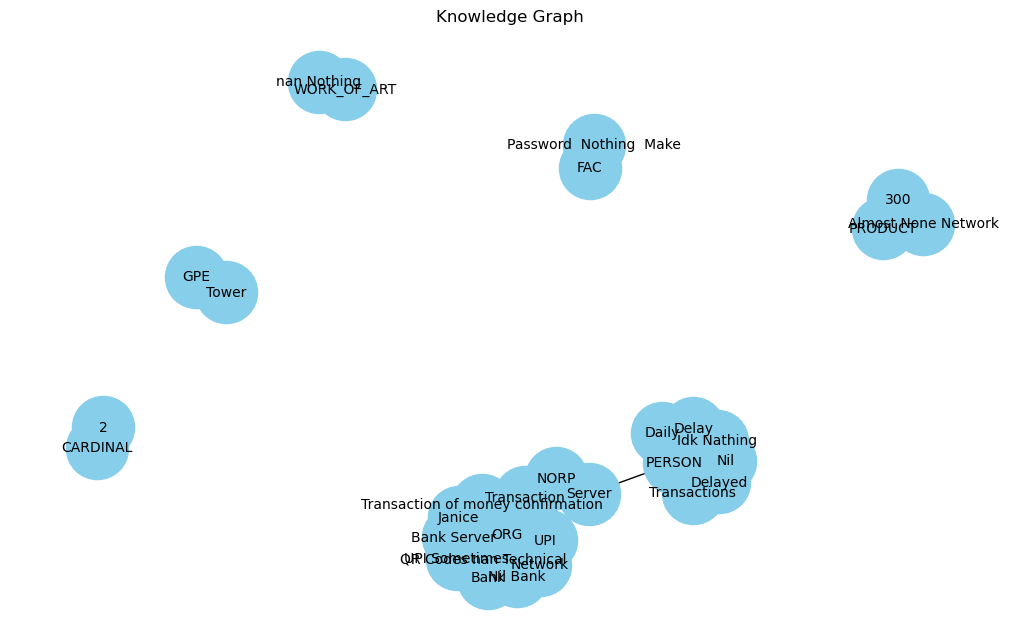

In [2]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the Excel file
# Replace 'Forms_data.xlsx' with the path to your Excel file
excel_file = 'Forms_data.xlsx'
df = pd.read_excel(excel_file)

# Step 1: Check column names to find the correct one
print("Available columns:", df.columns)

# Replace 'comment' with the actual column name containing the text data
# Assuming there's a column with text data (replace 'comment' if it's different)
text_column = 'Comments\n'  # Change this based on actual column name

if text_column in df.columns:
    # Combine all comments into a single string
    text_data = ' '.join(df[text_column].astype(str).tolist())  
else:
    raise KeyError(f"Column '{text_column}' not found in the DataFrame. Available columns: {df.columns}")

# Step 2: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and convert to lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)

print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Step 3: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)

print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Step 4: Derive Knowledge Graph
edges = []
for ent in doc.ents:
    edges.append((ent.text, ent.label_))

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 5: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


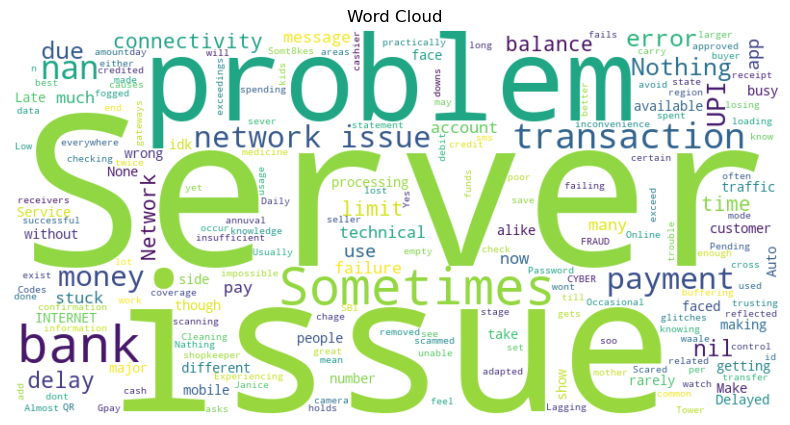

In [6]:
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [8]:
from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"{' '.join(bigram)}: {count}")


Top 10 Bigrams:
server issues: 11
bank server: 7
network issues: 6
server issue: 5
network issue: 5
issues nil: 4
sometimes delay: 3
sometimes server: 3
issue bank: 3
issues sometimes: 3


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Replace NaN values in 'Comments\n' column with an empty string
df['Comments\n'] = df['Comments\n'].fillna('')

# Initialize the TfidfVectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Apply the vectorizer to the 'Comments\n' column
tfidf_matrix = vectorizer.fit_transform(df['Comments\n'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF matrix
print("\nTF-IDF Matrix:")
print(tfidf_df.head())



TF-IDF Matrix:
   300  account  accounts  adapted  add  alike  annuval  app  approved  apps  \
0  0.0      0.0       0.0      0.0  0.0    0.0      0.0  0.0       0.0   0.0   
1  0.0      0.0       0.0      0.0  0.0    0.0      0.0  0.0       0.0   0.0   
2  0.0      0.0       0.0      0.0  0.0    0.0      0.0  0.0       0.0   0.0   
3  0.0      0.0       0.0      0.0  0.0    0.0      0.0  0.0       0.0   0.0   
4  0.0      0.0       0.0      0.0  0.0    0.0      0.0  0.0       0.0   0.0   

   ...  usage  use  used  usually  waale  watch  wont  work  wrong  yes  
0  ...    0.0  0.0   0.0      0.0    0.0    0.0   0.0   0.0    0.0  0.0  
1  ...    0.0  0.0   0.0      0.0    0.0    0.0   0.0   0.0    0.0  0.0  
2  ...    0.0  0.0   0.0      0.0    0.0    0.0   0.0   0.0    0.0  0.0  
3  ...    0.0  0.0   0.0      0.0    0.0    0.0   0.0   0.0    0.0  0.0  
4  ...    0.0  0.0   0.0      0.0    0.0    0.0   0.0   0.0    0.0  0.0  

[5 rows x 205 columns]
